Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import numpy as np

In [2]:
# help(scikit-learn.datasets)

In [3]:
mnist = fetch_openml('mnist_784'); #data is fetched here

In [4]:
X = mnist['data']
y = mnist['target'] 

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
# Say, 'some_digit' is your Pandas Series

some_digit = X.to_numpy()[36001] # function to convert a Series x to a NumPy array,
some_digit_image = some_digit.reshape(28,28)

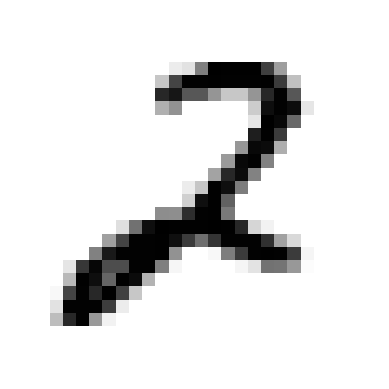

In [10]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary , interpolation="nearest");
plt.axis("off");

In [11]:
X_train = X[:60000] 
# training data from 0 to 60000 
X_test = X[60000:]
# testing data from 60000 to 70000 

In [12]:
y_train = y[:60000]
y_test = y[60000:]

In [13]:
import numpy as np
# Numerical Python library for numerical computing (arrays)
shuffle_index = np.random.permutation(60000) # 0 to 59999 , shuffles array indices
# shuffling in order to remove ambiguity from algorithm if dataset is in ordered

In [14]:
X_train = X_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

#X_train = X_train[shuffle_index] 
# training through the shuffle index
#y_train = y_train[shuffle_index]

 Creating a 2 detector : Is a digit 2 or not?

In [15]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [16]:
y_train

11261    6
37037    6
2431     7
30346    2
19574    7
        ..
47394    1
23861    5
32459    0
27510    5
29988    8
Name: class, Length: 60000, dtype: int8

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression(tol = 0.1)

In [19]:
clf.fit(X_train,y_train_2)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [20]:
clf.predict([some_digit])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [21]:
# Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,X_train,y_train_2,cv=3,scoring="accuracy")

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

array([0.97695, 0.97875, 0.9794 ])

In [ ]:
a.mean()